In [129]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sys
import cv2
import random

In [130]:
%run Optimization_methods.ipynb
%run helpers.ipynb

In [131]:
#read input parameters
hp=read_params('input.txt')

In [132]:
#reading data 
X_train, y_train, X_val, y_val, X_test, y_test = read_data('sign_mnist_train.csv','sign_mnist_test.csv')

In [133]:
#Assigning input values to parameters
eta = float(hp['learning_rate'])
gamma = float(hp['momentum'])
num_hidden_layers =int(hp['number_of_hidden_layers'])
num_neurons = hp['Number_of_neurons_in_each_hidden_layer']
sizes=[int(s) for s in num_neurons.split(',')]
activation_func = hp['Activation_func']
loss_func = hp['loss']
batch_size = int(hp['batch_size'])
optimizer = hp['Optimizer']
num_epochs =int(hp['epochs'])
beta1 = float(hp['beta1'])
beta2 = float(hp['beta2'])
inputsize=X_train.shape[1]
outputsize=y_train.shape[1]
eps=1e-8

In [134]:
num_epochs
print(batch_size)

20


In [135]:
opti=['gd','mgd','mg','adam','nag']
train_loss_gd,val_loss_gd=gradient_descent(X_train,y_train,X_val,y_val,activation_func, loss_func, eta, num_epochs, num_hidden_layers, sizes, batch_size,inputsize,outputsize)
train_loss_mgd, val_loss_mgd, epochs_mgd=minibatch_gradient_descent(X_train,y_train,X_val,y_val,activation_func, loss_func, eta, num_epochs, num_hidden_layers, sizes, batch_size,inputsize,outputsize)
train_loss_mg,val_loss_mg,epochs_mg=mgd(X_train, y_train, X_val, y_val, activation_func, loss_func, eta, gamma, num_epochs, num_hidden_layers, sizes, batch_size,inputsize, outputsize)
train_loss_adam,val_loss_adam,epochs_adam=adam(X_train, y_train, X_val, y_val, activation_func, loss_func, eta, num_epochs, num_hidden_layers, sizes, batch_size,inputsize, outputsize, beta1, beta2, eps)
train_loss_nag,val_loss_nag,epochs_nag=nag(X_train, y_train, X_val, y_val, activation_func, loss_func, eta,gamma, num_epochs, num_hidden_layers, sizes, batch_size,inputsize, outputsize)


Gradient_descent
0
for epoch 0 train error: 100.0  train loss:9.547048594727418  validation error:92.0  validation loss:8.854214160146714
1
for epoch 1 train error: 100.0  train loss:8.300776240250306  validation error:92.0  validation loss:8.291745281900761
2
for epoch 2 train error: 100.0  train loss:8.461890706950086  validation error:92.0  validation loss:8.891903367775999
3
for epoch 3 train error: 100.0  train loss:6.302577155749738  validation error:92.0  validation loss:6.630227030618221
4
for epoch 4 train error: 100.0  train loss:7.6284912079391  validation error:92.0  validation loss:8.08725036264176
5
for epoch 5 train error: 100.0  train loss:9.310837037546028  validation error:92.0  validation loss:9.582114508659481
6
for epoch 6 train error: 100.0  train loss:7.284539683555835  validation error:92.0  validation loss:6.88401314787727
7
for epoch 7 train error: 100.0  train loss:7.604017883349925  validation error:92.0  validation loss:7.626738271077832
8
for epoch 8 train

for epoch 27 train error: 100.0  train loss:3.7944858032636  validation error:92.0  validation loss:4.778005392454879
28
for epoch 28 train error: 100.0  train loss:3.7383278900076244  validation error:92.0  validation loss:4.89986085537733
29
for epoch 29 train error: 100.0  train loss:3.7123629096785855  validation error:92.0  validation loss:4.831520327906088
30
for epoch 30 train error: 100.0  train loss:3.744345216620317  validation error:92.0  validation loss:4.965954068959557
31
for epoch 31 train error: 100.0  train loss:3.6514109746637677  validation error:92.0  validation loss:4.66220456061166
32
for epoch 32 train error: 100.0  train loss:3.6109772844585053  validation error:92.0  validation loss:5.016040856396659
33
for epoch 33 train error: 100.0  train loss:3.600903916557823  validation error:92.0  validation loss:4.895092446527706
34
for epoch 34 train error: 100.0  train loss:3.5744941540545456  validation error:92.0  validation loss:5.167772874138277
35
for epoch 35 tr

for epoch 15 train error: 100.0  train loss:4.673987043530033  validation error:92.0  validation loss:5.095661245059409
for epoch 16 train error: 100.0  train loss:4.660060323777162  validation error:92.0  validation loss:5.194932543054091
for epoch 17 train error: 100.0  train loss:4.618826733481702  validation error:92.0  validation loss:5.255811269117694
for epoch 18 train error: 100.0  train loss:4.555871239562921  validation error:92.0  validation loss:5.205730850227616
for epoch 19 train error: 100.0  train loss:4.385595088077767  validation error:92.0  validation loss:4.948126957014904
for epoch 20 train error: 100.0  train loss:4.173682744777952  validation error:92.0  validation loss:4.768646488149899
for epoch 21 train error: 100.0  train loss:4.029206838018259  validation error:92.0  validation loss:4.612310805797113
for epoch 22 train error: 100.0  train loss:3.9945854510739083  validation error:92.0  validation loss:4.574462430742689
for epoch 23 train error: 100.0  train 

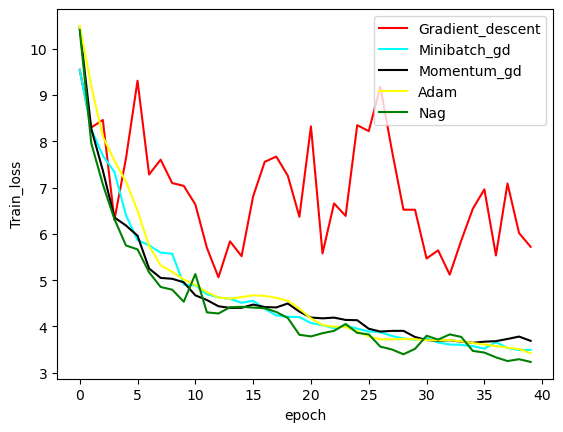

In [136]:
plt.plot(epochs_mgd,train_loss_gd,color='r',label='Gradient_descent')
plt.plot(epochs_mgd,train_loss_mgd,color='cyan',label='Minibatch_gd')
plt.plot(epochs_mgd,train_loss_mg,color='black',label='Momentum_gd')
plt.plot(epochs_mgd,train_loss_adam,color='yellow',label='Adam')
plt.plot(epochs_mgd,train_loss_nag,color='green',label='Nag')
plt.xlabel('epoch')
plt.ylabel('Train_loss')
plt.legend()
plt.show()
 

In [140]:
import tensorflow as tf


2023-08-20 11:04:34.979093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [147]:
model =tf.keras.Sequential()
input_layer = tf.keras.Input(shape=(X_train.shape[1],))
model.add(input_layer)
for i in range(0,num_hidden_layers):
    layer = tf.keras.layers.Dense(sizes[i], activation='sigmoid')
    model.add(layer)

output_layer = tf.keras.layers.Dense(25, activation = 'softmax')    
model.add(output_layer)


In [148]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [149]:
model.fit(X_train,y_train, epochs = 40)

Epoch 1/40
687/687 [==============================] - 2s 2ms/step - loss: 2.6377 - accuracy: 0.1982
Epoch 2/40
687/687 [==============================] - 2s 3ms/step - loss: 1.5971 - accuracy: 0.4901
Epoch 3/40
687/687 [==============================] - 1s 2ms/step - loss: 1.1558 - accuracy: 0.6228
Epoch 4/40
687/687 [==============================] - 1s 2ms/step - loss: 0.9313 - accuracy: 0.6935
Epoch 5/40
687/687 [==============================] - 1s 2ms/step - loss: 0.7656 - accuracy: 0.7521
Epoch 6/40
687/687 [==============================] - 2s 2ms/step - loss: 0.6251 - accuracy: 0.8083
Epoch 7/40
687/687 [==============================] - 2s 3ms/step - loss: 0.4985 - accuracy: 0.8533
Epoch 8/40
687/687 [==============================] - 2s 3ms/step - loss: 0.3849 - accuracy: 0.8939
Epoch 9/40
687/687 [==============================] - 2s 3ms/step - loss: 0.2833 - accuracy: 0.9323
Epoch 10/40
687/687 [==============================] - 2s 2ms/step - loss: 0.2010 - accuracy: 0.9613

In [ ]:
def read_test_data